In [71]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format

#Data Reading
#CheckPoint 1 - Understand the data set
companies = pd.read_csv("companies.csv", sep="\t", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")

In [72]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000"


In [73]:
#Unique companies present in rounds2 out of 114949 records
unique_round2 = rounds2['company_permalink'].astype(str).str.lower().unique()
len(unique_round2)

66370

In [74]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [75]:
#Unique companies present in companies out of 66368 records
unique_companies = companies['permalink'].astype(str).str.lower().unique()
len(unique_companies)

66368

In [76]:
#Column that can be named as unique key for each company
print('permalink')

permalink


In [77]:
#As we can clearly see that unique companies in rounds2 file is 2 more than in companies file
ans = companies['permalink'].str.lower().equals(unique_round2)
if ans == True:
    print("N")
else:
    print("Y")

Y


In [78]:
rounds2['permalink'] = rounds2['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

In [79]:
#Merging tables
master_frame = pd.merge(companies,rounds2,how='inner', on='permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000"
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000"


In [80]:
master_frame.isnull().any()

permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
dtype: bool

In [81]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6126
category_list               3387
status                         0
country_code                8637
state_code                 10903
region                     10126
city                       10123
founded_at                 20488
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83743
funded_at                      0
raised_amount_usd          19960
dtype: int64

In [82]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114875 entries, 0 to 114874
Data columns (total 16 columns):
permalink                  114875 non-null object
name                       114874 non-null object
homepage_url               108749 non-null object
category_list              111488 non-null object
status                     114875 non-null object
country_code               106238 non-null object
state_code                 103972 non-null object
region                     104749 non-null object
city                       104752 non-null object
founded_at                 94387 non-null object
company_permalink          114875 non-null object
funding_round_permalink    114875 non-null object
funding_round_type         114875 non-null object
funding_round_code         31132 non-null object
funded_at                  114875 non-null object
raised_amount_usd          94915 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [83]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0
name                       0
homepage_url               5
category_list              3
status                     0
country_code               8
state_code                 9
region                     9
city                       9
founded_at                18
company_permalink          0
funding_round_permalink    0
funding_round_type         0
funding_round_code        73
funded_at                  0
raised_amount_usd         17
dtype: float64

In [84]:
#Data Cleaning
# Removing of non contributing and duplicates rows
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)
# NA values present in column raised_amount_usd
master_frame = master_frame[np.isfinite(master_frame['raised_amount_usd'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                 0
name                      0
homepage_url              5
category_list             1
status                    0
country_code              6
state_code                8
region                    7
city                      7
funding_round_permalink   0
funding_round_type        0
funded_at                 0
raised_amount_usd         0
dtype: float64

In [85]:
master_frame.groupby('funding_round_type').mean()

,raised_amount_usd
funding_round_type,
angel,"958,892"
convertible_note,"1,457,327"
debt_financing,"17,043,526"
equity_crowdfunding,"539,113"
grant,"4,312,660"
non_equity_assistance,"411,203"
post_ipo_debt,"168,704,572"
post_ipo_equity,"82,182,494"
private_equity,"73,341,462"


In [86]:
venture_mean = master_frame.loc[master_frame['funding_round_type'] == 'venture']
avg_venture = venture_mean.groupby('funding_round_type').mean()
avg_venture.raised_amount_usd = avg_venture.raised_amount_usd.map(lambda x: '{:.0f}'.format(x))
print(avg_venture)

                   raised_amount_usd
funding_round_type                  
venture                     11749431


In [87]:
angel_mean = master_frame.loc[master_frame['funding_round_type'] == 'angel']
avg_angel = angel_mean.groupby('funding_round_type').mean()
avg_angel.raised_amount_usd = avg_angel.raised_amount_usd.map(lambda x: '{:.0f}'.format(x))
print(avg_angel)

                   raised_amount_usd
funding_round_type                  
angel                         958892


In [88]:
seed_mean = master_frame.loc[master_frame['funding_round_type'] == 'seed']
avg_seed = seed_mean.groupby('funding_round_type').mean()
avg_seed.raised_amount_usd = avg_seed.raised_amount_usd.map(lambda x: '{:.0f}'.format(x))
print(avg_seed)

                   raised_amount_usd
funding_round_type                  
seed                          719892


In [89]:
private_equity_mean = master_frame.loc[master_frame['funding_round_type'] == 'private_equity']
avg_private_equity = private_equity_mean.groupby('funding_round_type').mean()
avg_private_equity.raised_amount_usd = avg_private_equity.raised_amount_usd.map(lambda x: '{:.0f}'.format(x))
print(avg_private_equity)

                   raised_amount_usd
funding_round_type                  
private_equity              73341462


In [90]:
data = {'Investment_Type' : ['venture','angel','seed','private_equity'], 
        'raised_amount_usd' : [11749431,958892,719892,73341462]}
df = pd.DataFrame(data)
df_InvestmentType= df[(df.raised_amount_usd >= 5000000) & (df.raised_amount_usd < 15000000)]
print(df_InvestmentType)

  Investment_Type  raised_amount_usd
0         venture           11749431


In [91]:
#ChackPoint 3 - Top 3 countries
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA   422,510,842,796
CHN    39,835,418,773
GBR    20,245,627,416
IND    14,391,858,718
CAN     9,583,332,317
FRA     7,241,142,340
ISR     6,907,514,579
DEU     6,345,559,822
JPN     3,363,676,611
Name: raised_amount_usd, dtype: float64

In [92]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000"
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,"3,406,878"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000"
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491"
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000"
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000"
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000"
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000"
28,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000"
34,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000"


In [93]:
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796
CHN    39,835,418,773
GBR    20,245,627,416
IND    14,391,858,718
CAN     9,583,332,317
FRA     7,241,142,340
ISR     6,907,514,579
DEU     6,345,559,822
JPN     3,363,676,611
Name: raised_amount_usd, dtype: float64

In [94]:
top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000"
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491"
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000"
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000"


In [95]:
#checking for englist speking countries and comingout with the result
top3 = top9[top9['country_code'].isin(['USA','GBR','IND'])]
top3.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796
GBR    20,245,627,416
IND    14,391,858,718
Name: raised_amount_usd, dtype: float64

In [96]:
#Extraction of Category List
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x: str(x).split('|')[0])
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000",Media
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,"3,406,878",Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000",Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491",Biotechnology
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000",Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000",Analytics
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000",Analytics
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000",Apps
28,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000",Education
34,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000",Curated Web


In [97]:
master_frame.dropna(subset=['country_code'], inplace=True)
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000",Media
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000",Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491",Biotechnology
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000",Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000",Analytics
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000",Analytics
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000",Apps
28,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,"4,000,000",Education
34,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,"2,520,000",Curated Web
38,/organization/1000museums-com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,"265,940",Curated Web


In [98]:
mapping = pd.melt(mapping,id_vars=['category_list'])
mapping = mapping[mapping.value!=0]
mapping
mapping.dropna()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [99]:
mapping = mapping.drop('value', axis=1)
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)

In [100]:
import re
mapping['primary_sector'] = mapping.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))

In [101]:
#Merged Data frame
sector_wisedf = pd.merge(master_frame, mapping, how='left', on='primary_sector')
sector_wisedf[['country_code','primary_sector','main_sector']]

,country_code,primary_sector,main_sector
0,IND,Media,Entertainment
1,CHN,Curated Web,"News, Search and Messaging"
2,CAN,Biotechnology,Cleantech / Semiconductors
3,USA,Analytics,"Social, Finance, Analytics, Advertising"
4,USA,Analytics,"Social, Finance, Analytics, Advertising"
5,USA,Analytics,"Social, Finance, Analytics, Advertising"
6,USA,Apps,"News, Search and Messaging"
7,GBR,Education,Others
8,USA,Curated Web,"News, Search and Messaging"
9,USA,Curated Web,"News, Search and Messaging"


In [102]:
Country1 = "USA"
Country2 = "GBR"
Country3 = "IND"

sector_wisedf = sector_wisedf[(sector_wisedf.raised_amount_usd >= 5000000) & (sector_wisedf.raised_amount_usd <= 15000000)]
D1 =  sector_wisedf.loc[sector_wisedf['country_code'] == Country1]
D1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
5,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000",Analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000",Apps,"News, Search and Messaging"
30,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,"11,999,347",Service Providers,Others
34,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,"15,000,000",Manufacturing,Manufacturing
35,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,"5,000,000",Manufacturing,Manufacturing
36,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/786f61aa9866f4471151285f5c56be36,venture,03-02-2010,"5,150,000",Manufacturing,Manufacturing
37,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,27-03-2008,"12,400,000",Manufacturing,Manufacturing
38,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,16-12-2010,"6,000,000",Manufacturing,Manufacturing
44,/organization/170-systems,170 Systems,http://www.170systems.com,Software,acquired,USA,MA,Boston,Bedford,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,"14,000,000",Software,Others
49,/organization/17zuoye,17zuoye,http://www.17zuoye.com/,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,"5,000,000",Education,Others


In [103]:
D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,167,"1,454,104,361"
Blanks,86,"764,763,292"
Cleantech / Semiconductors,2300,"21,206,628,192"
Entertainment,591,"5,099,197,982"
Health,909,"8,211,859,357"
Manufacturing,799,"7,258,553,378"
"News, Search and Messaging",1582,"13,959,567,428"
Others,2950,"26,321,007,002"
"Social, Finance, Analytics, Advertising",2714,"23,807,376,964"


In [104]:
D1[D1['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/virtustream           64,300,000
/organization/capella               54,968,051
/organization/airtight-networks     54,201,907
/organization/decarta               52,100,000
/organization/black-duck-software   51,000,000
Name: raised_amount_usd, dtype: float64

In [105]:
D1[D1['main_sector'] =='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/shotspotter   67,933,006
/organization/demandbase    63,000,000
/organization/intacct       61,800,000
/organization/netbase       60,600,000
/organization/lotame        59,700,000
Name: raised_amount_usd, dtype: float64

In [106]:
D1[D1['permalink'] == '/organization/virtustream']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
45103,/organization/virtustream,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,/funding-round/3354ac55dd5369fa5fb282e7946baadf,venture,08-10-2009,"9,550,000",Enterprise Software,Others
45104,/organization/virtustream,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,/funding-round/4cdede382a6f29d05b59d833773910ee,venture,07-07-2011,"10,000,000",Enterprise Software,Others
45106,/organization/virtustream,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,/funding-round/5f44788266cec29ef0ca4a54bf37c805,venture,02-02-2011,"9,750,000",Enterprise Software,Others
45108,/organization/virtustream,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,/funding-round/ad39aaecd63911d035b37907cebfc3fd,venture,09-03-2012,"15,000,000",Enterprise Software,Others
45109,/organization/virtustream,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,/funding-round/aeb17cd77f13485b94d9f37409caddeb,venture,08-11-2012,"5,000,000",Enterprise Software,Others
45111,/organization/virtustream,Virtustream,http://www.virtustream.com,Enterprise Software,acquired,USA,MD,"Washington, D.C.",Bethesda,/funding-round/e609500837793f94351a0c77716baa47,venture,02-05-2010,"15,000,000",Enterprise Software,Others


In [107]:
D1[D1['permalink'] == '/organization/shotspotter']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
37642,/organization/shotspotter,SST Inc. (Formerly ShotSpotter),http://www.shotspotter.com,Analytics|Security,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/7b805ab263f957c009d64db6cd635962,venture,16-06-2011,"10,500,000",Analytics,"Social, Finance, Analytics, Advertising"
37643,/organization/shotspotter,SST Inc. (Formerly ShotSpotter),http://www.shotspotter.com,Analytics|Security,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/951fa3e337deb37fb9b9865a71daacb2,venture,08-09-2015,"9,682,006",Analytics,"Social, Finance, Analytics, Advertising"
37644,/organization/shotspotter,SST Inc. (Formerly ShotSpotter),http://www.shotspotter.com,Analytics|Security,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/9c10cf4871148625aa0dc8901433847d,venture,01-07-2012,"6,851,000",Analytics,"Social, Finance, Analytics, Advertising"
37645,/organization/shotspotter,SST Inc. (Formerly ShotSpotter),http://www.shotspotter.com,Analytics|Security,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/a8e618d71826fd7558a05a55f1b6bcf6,venture,05-06-2007,"12,000,000",Analytics,"Social, Finance, Analytics, Advertising"
37646,/organization/shotspotter,SST Inc. (Formerly ShotSpotter),http://www.shotspotter.com,Analytics|Security,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/b91be462b1f64632d5343317eceabfa9,venture,11-04-2006,"9,400,000",Analytics,"Social, Finance, Analytics, Advertising"
37647,/organization/shotspotter,SST Inc. (Formerly ShotSpotter),http://www.shotspotter.com,Analytics|Security,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/cd1704ff96ae8eb92cd16699ed0fda85,venture,02-10-2012,"12,000,000",Analytics,"Social, Finance, Analytics, Advertising"
37648,/organization/shotspotter,SST Inc. (Formerly ShotSpotter),http://www.shotspotter.com,Analytics|Security,operating,USA,CA,SF Bay Area,Mountain View,/funding-round/fa167520a83e6d20957f10f1528ed79a,venture,13-05-2008,"7,500,000",Analytics,"Social, Finance, Analytics, Advertising"


In [108]:
D2 =  sector_wisedf.loc[sector_wisedf['country_code'] == Country2]
D2

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
153,/organization/365scores,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,"5,500,000",Android,"Social, Finance, Analytics, Advertising"
341,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,"8,468,328",Content Creators,Entertainment
342,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,"10,000,000",Content Creators,Entertainment
369,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,"15,000,000",Media,Entertainment
370,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,"5,800,000",Media,Entertainment
446,/organization/abcodia,Abcodia,http://abcodia.com,Biotechnology,operating,GBR,H9,London,London,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,18-05-2015,"8,259,067",Biotechnology,Cleantech / Semiconductors
531,/organization/acacia-pharma,Acacia Pharma,http://www.acaciapharma.com,Biotechnology,operating,GBR,C3,London,Cambridge,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,31-03-2011,"10,000,000",Biotechnology,Cleantech / Semiconductors
546,/organization/acal-energy,ACAL Energy,http://www.acalenergy.co.uk,Clean Technology,operating,GBR,C5,Runcorn,Runcorn,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,15-06-2011,"9,910,333",Clean Technology,Cleantech / Semiconductors
549,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,http://acalenterprisesolutions.com,Information Technology,operating,GBR,J8,Nottingham,Nottingham,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,03-06-2014,"10,720,178",Information Technology,"Social, Finance, Analytics, Advertising"
591,/organization/accent-media-ltd,Accent Media Limited,http://accent.media,Domains|Internet|Ticketing,operating,GBR,H9,London,London,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,01-07-2013,"8,300,000",Domains,"News, Search and Messaging"


In [109]:
D2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,16,"167,051,565"
Blanks,7,"57,764,848"
Cleantech / Semiconductors,128,"1,150,139,665"
Entertainment,56,"482,784,687"
Health,24,"214,537,510"
Manufacturing,42,"361,940,335"
"News, Search and Messaging",73,"615,746,235"
Others,147,"1,283,624,289"
"Social, Finance, Analytics, Advertising",133,"1,089,404,014"


In [110]:
D2[D2['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/electric-cloud            37,000,000
/organization/sensage                   36,250,000
/organization/enigmatic                 32,500,000
/organization/silverrail-technologies   29,000,000
/organization/opencloud                 27,972,766
Name: raised_amount_usd, dtype: float64

In [111]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/celltick-technologies   37,500,000
/organization/mythings                34,000,000
/organization/zopa                    32,900,000
/organization/imagini                 28,550,000
/organization/marketinvoice           25,553,007
Name: raised_amount_usd, dtype: float64

In [112]:
D2[D2['permalink'] == '/organization/electric-cloud']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
13539,/organization/electric-cloud,Electric Cloud,http://www.electric-cloud.com,Software,operating,GBR,H9,London,London,/funding-round/0471ecf9dc235b2d8900b4acf6fa47b0,venture,17-01-2007,"9,000,000",Software,Others
13540,/organization/electric-cloud,Electric Cloud,http://www.electric-cloud.com,Software,operating,GBR,H9,London,London,/funding-round/18b59aa860d015808d7e0e4a5dfe2e7e,venture,03-09-2013,"8,000,000",Software,Others
13541,/organization/electric-cloud,Electric Cloud,http://www.electric-cloud.com,Software,operating,GBR,H9,London,London,/funding-round/92b7e109112fc2d0bb8e72a07cd64013,venture,12-07-2004,"8,000,000",Software,Others
13544,/organization/electric-cloud,Electric Cloud,http://www.electric-cloud.com,Software,operating,GBR,H9,London,London,/funding-round/cfc71183f508736cbf12dc17d2f2c91f,venture,18-06-2014,"12,000,000",Software,Others


In [113]:
D2[D2['permalink'] == '/organization/celltick-technologies']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
8197,/organization/celltick-technologies,Celltick Technologies,http://www.celltick.com,Advertising|Mobile,operating,GBR,H9,London,London,/funding-round/7370d192f693be870a77d4bc5d16c995,venture,01-01-2011,"8,000,000",Advertising,"Social, Finance, Analytics, Advertising"
8198,/organization/celltick-technologies,Celltick Technologies,http://www.celltick.com,Advertising|Mobile,operating,GBR,H9,London,London,/funding-round/7c72d9ba319e41cfff22f41f35a9c70d,venture,07-11-2007,"8,500,000",Advertising,"Social, Finance, Analytics, Advertising"
8199,/organization/celltick-technologies,Celltick Technologies,http://www.celltick.com,Advertising|Mobile,operating,GBR,H9,London,London,/funding-round/9a24b5f22876d7a84d50383b00127a1f,venture,09-08-2001,"10,000,000",Advertising,"Social, Finance, Analytics, Advertising"
8201,/organization/celltick-technologies,Celltick Technologies,http://www.celltick.com,Advertising|Mobile,operating,GBR,H9,London,London,/funding-round/f89f16f8f6e1ba8c87b6eaf866c9eeeb,venture,07-03-2005,"11,000,000",Advertising,"Social, Finance, Analytics, Advertising"


In [114]:
D3 =  sector_wisedf.loc[sector_wisedf['country_code'] == Country3]
D3

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000",Media,Entertainment
79,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,"6,369,507",E-Commerce,Others
402,/organization/a-little-world,A LITTLE WORLD,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,"6,410,000",Finance,"Social, Finance, Analytics, Advertising"
1157,/organization/adlabs-imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,"8,180,000",Entertainment,Entertainment
1581,/organization/agile,Agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,"5,740,000",Finance,"Social, Finance, Analytics, Advertising"
1893,/organization/akosha,Akosha,http://www.akosha.com,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,7,New Delhi,New Delhi,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,01-07-2014,"5,000,000",Consumer Internet,"Social, Finance, Analytics, Advertising"
2381,/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,Advertising,operating,IND,19,Bangalore,Bangalore,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,17-06-2013,"5,500,000",Advertising,"Social, Finance, Analytics, Advertising"
2497,/organization/ameyo,Ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,03-07-2015,"5,000,000",Software,Others
2753,/organization/ani-technologies,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,28,Kolkata,Kolkata,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,10-04-2012,"5,000,000",Automotive,Automotive & Sports
2783,/organization/annapurna-microfinace,Annapurna Microfinace,http://ampl.net.in,Finance,operating,IND,21,Bhubaneswar,Bhubaneswar,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,26-03-2014,"5,000,000",Finance,"Social, Finance, Analytics, Advertising"


In [115]:
D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,13,"136,900,000"
Blanks,2,"27,000,000"
Cleantech / Semiconductors,20,"165,380,000"
Entertainment,33,"280,830,000"
Health,19,"167,740,000"
Manufacturing,21,"200,900,000"
"News, Search and Messaging",52,"433,834,545"
Others,110,"1,013,409,507"
"Social, Finance, Analytics, Advertising",60,"550,549,550"


In [116]:
D3[D3['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/firstcry-com       39,000,000
/organization/myntra             38,000,000
/organization/commonfloor        32,900,000
/organization/pepperfry-com      28,000,000
/organization/itzcash-card-ltd   25,000,000
Name: raised_amount_usd, dtype: float64

In [117]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/manthan-systems              50,700,000
/organization/komli-media                  28,000,000
/organization/shopclues-com                25,000,000
/organization/intarvo                      21,900,000
/organization/grameen-financial-services   21,556,050
Name: raised_amount_usd, dtype: float64

In [118]:
D3[D3['permalink'] == '/organization/firstcry-com']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
15597,/organization/firstcry-com,FirstCry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,21-01-2014,"15,000,000",E-Commerce,Others
15598,/organization/firstcry-com,FirstCry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,/funding-round/727bda07de7b5eaf31e484cb803b3c38,venture,08-04-2015,"10,000,000",E-Commerce,Others
15599,/organization/firstcry-com,FirstCry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,/funding-round/c2bd1e484cde75ff8b15f2ca4682e5cb,venture,13-02-2012,"14,000,000",E-Commerce,Others


In [119]:
D3[D3['permalink'] == '/organization/manthan-systems']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
24996,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,01-03-2007,"5,700,000",Analytics,"Social, Finance, Analytics, Advertising"
24997,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,09-12-2009,"15,000,000",Analytics,"Social, Finance, Analytics, Advertising"
24999,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,/funding-round/7db541211550feab15626b11aa479116,venture,15-02-2012,"15,000,000",Analytics,"Social, Finance, Analytics, Advertising"
25000,/organization/manthan-systems,Manthan Systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,/funding-round/a08435c935a0a43cd9069ad9480f8bb6,venture,20-11-2009,"15,000,000",Analytics,"Social, Finance, Analytics, Advertising"


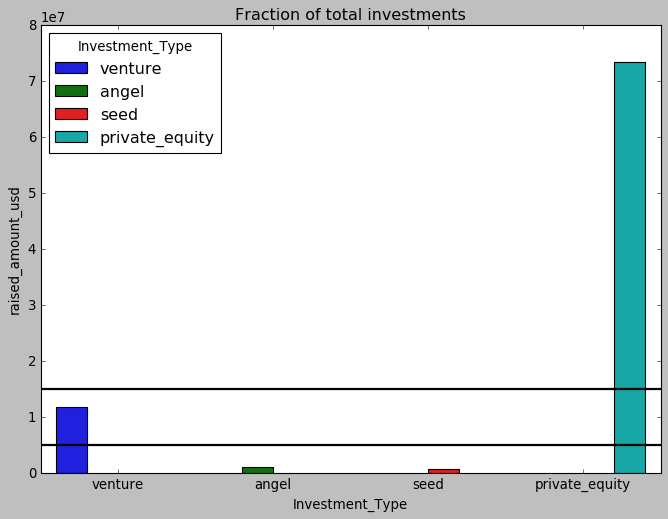

In [120]:
#CheckPoint 6
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,7))
sns.barplot(x='Investment_Type', y='raised_amount_usd', data=df,hue="Investment_Type")
plt.title("Fraction of total investments")
#Applying amount contraint
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.style.use('classic')
plt.show()

C:\Users\vinarain\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


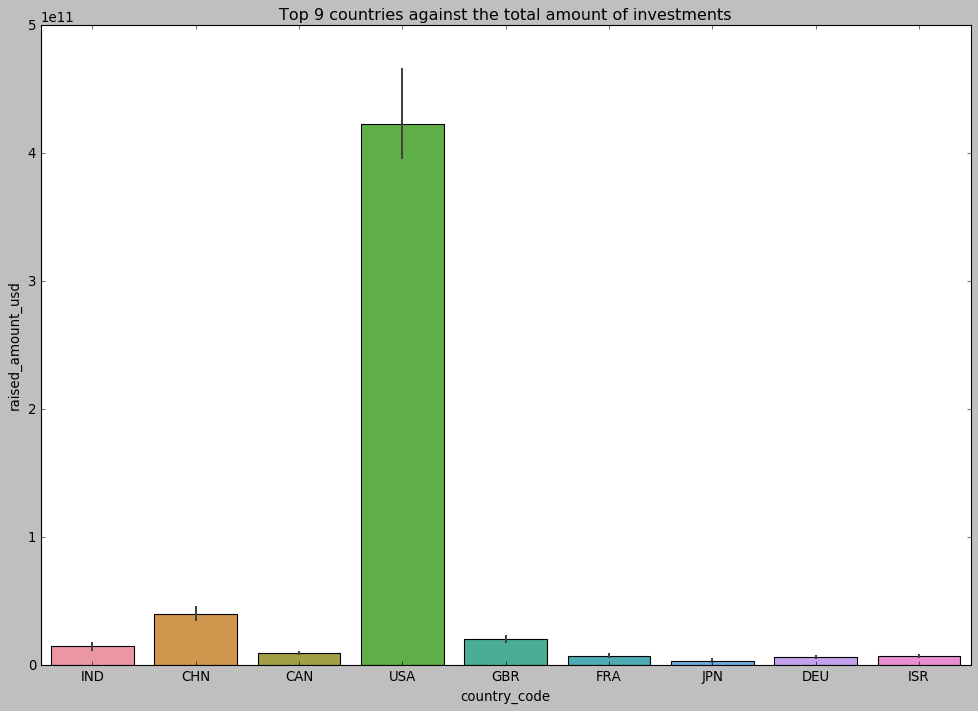

In [121]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=sum)
plt.title("Top 9 countries against the total amount of investments")
plt.style.use('classic')
plt.show()

In [122]:
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]

In [123]:
D2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]

In [124]:
D3= D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]

C:\Users\vinarain\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


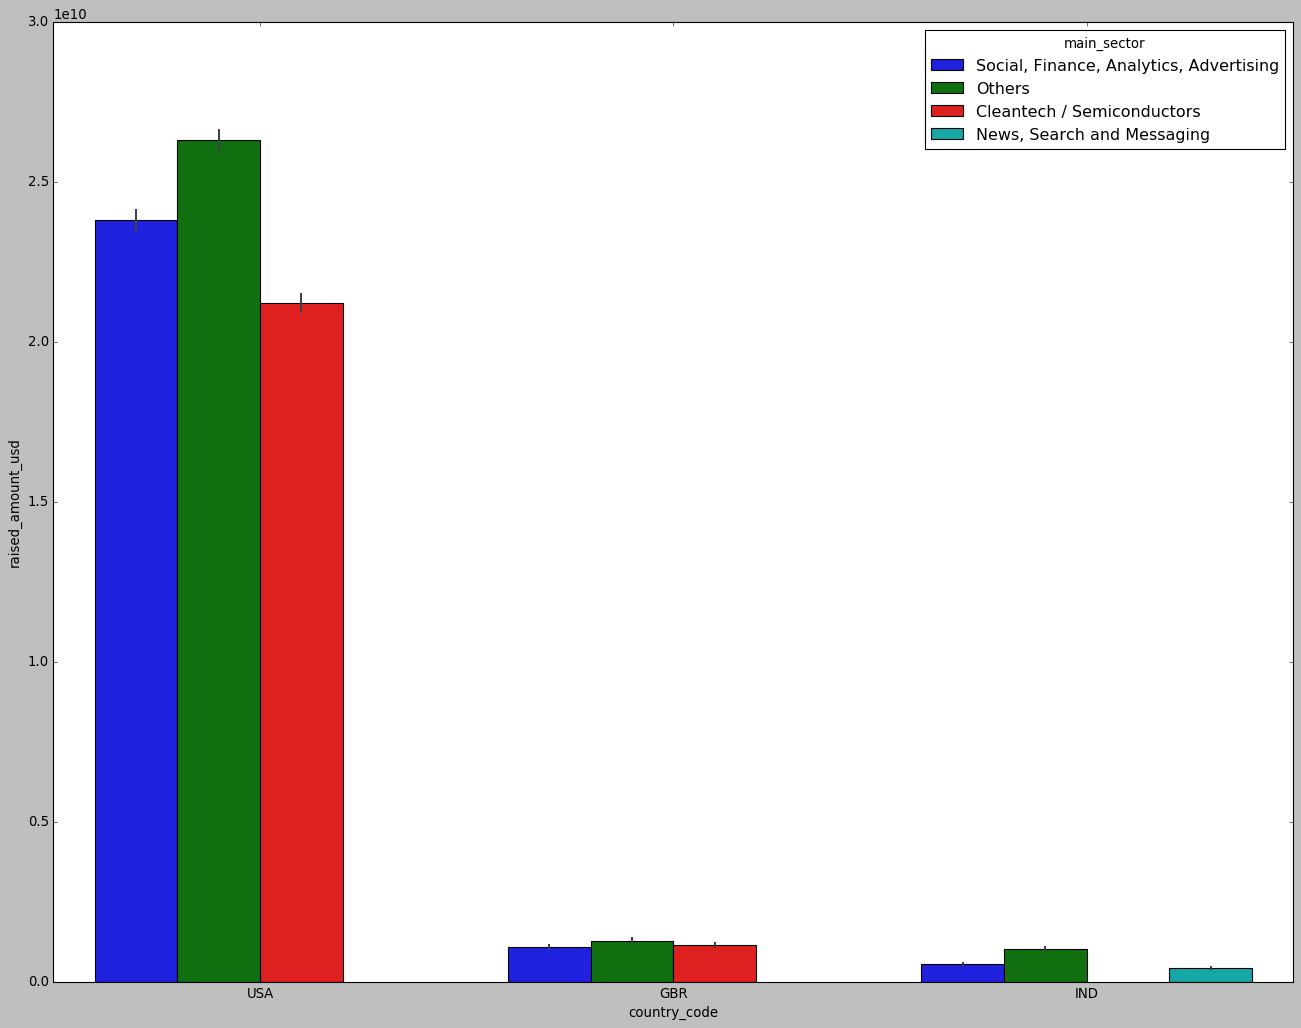

In [125]:

frames = [D1, D2, D3]
result = pd.concat(frames)
plt.figure(figsize=(20, 15))
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plt.show()